# Color Image Quantization
Reduce the number of colors in images (`lena.png`, `peppers.tif`) to 16 using K-means clustering, implemented from scratch. Log L2 norms per iteration and optionally visualize quantized images.

In [137]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [138]:
def calculate_l2_norm(original,quantized):
    """Calculate total L2 norm between original and quantized images.
    
    Args:
        original: Original image (H, W, 3) as float32 in [0, 1].
        quantized: Quantized image (H, W, 3) as float32 in [0, 1].
    
    Returns:
        l2_norm: Total L2 norm across all pixels.
    """
    #TODO: Compute L2 norm: sqrt(sum((R1-R2)^2 + (G1-G2)^2 + (B1-B2)^2))

    #Using numpy magic :)
    return np.linalg.norm(original-quantized)

In [139]:
def kmeans_quantization(image:np.ndarray,k=16,max_iterations=100,visualize=False):
    """Perform K-means color quantization on an image.
    
    Args:
        image: Input image (H, W, 3) as float32 in [0, 1].
        k: Number of clusters (colors).
        max_iterations: Maximum number of iterations.
        visualize: If True, display quantized image per iteration.
    
    Returns:
        quantized_image: Image with k colors.
        l2_norms: List of L2 norms per iteration.
    """
    #TODO: Implement K-means clustering from scratch
    #1. Reshape image to list of pixels (N, 3)
    #2. Initialize k centroids randomly
    #3. Assign pixels to nearest centroid (L2 norm)
    #4. Update centroids as mean of assigned pixels
    #5. Log L2 norm per iteration
    #6. Visualize if flag is enabled

    #Show original image
    if visualize:
                plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
                plt.title("Original Image")
                plt.axis("off")
                plt.show()

    #List of norms per iteration
    norms=[]

    #Reshape image to list of pixels
    image_list=image.reshape(-1,3)

    #Choose k random centers from k random indexes
    centers_i=np.random.choice(image_list.shape[0],k,False)
    centers=image_list[centers_i]

    #Iteration loop
    for i in range(max_iterations):
        #Calculate distance of each pixel from all centers
        distances=np.linalg.norm(image_list[:,np.newaxis]-centers,axis=2)

        #Find min distance and use index as lable
        clusters=np.argmin(distances,axis=1)

        #Create zeros in same shape
        new_centers=np.zeros_like(centers)

        #Calculate mean for each lable/cluster
        for d in range(k):
            image_cluster=image_list[clusters==d]
            if len(image_cluster)>0:
                new_centers[d]=np.mean(image_cluster,axis=0)
            else:
                new_centers[d]=centers[d]

        #Create image with new colors from lables
        new_image_list=new_centers[clusters]

        #Calculate L2 norm and update list of norms
        norm=calculate_l2_norm(image_list,new_image_list)
        norms.append(f"Iteration {i+1}: {norm}")
        
        #Show image per iteration
        if visualize:
                new_image=new_image_list.reshape(image.shape)
                plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))
                plt.title(f"Norm Of Iteration {i+1}: {norm}")
                plt.axis("off")
                plt.show()
        
        #Stop iteration if centers are same
        if np.allclose(centers,new_centers):break

        #Update centers
        centers=new_centers

    #Return image in original shape and list of norms
    return new_image_list.reshape(image.shape),norms

In [140]:
#Load images as float32 in [0,1]
image_path="./images/lena.png"
# image_path="./images/peppers.tif"

image=cv2.imread(image_path).astype(np.float32)/255.0

#Parameters
k=16
max_iterations=5
visualize=True

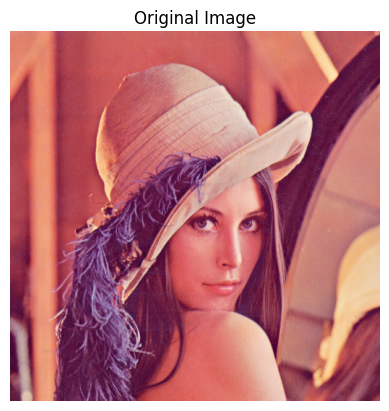

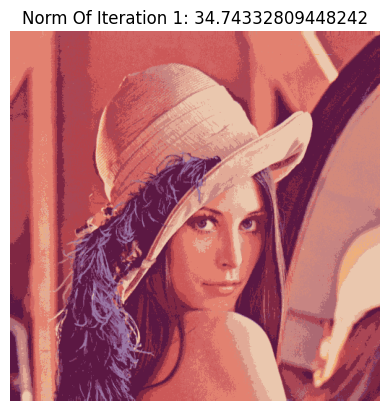

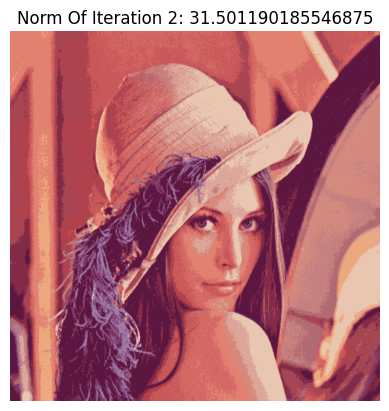

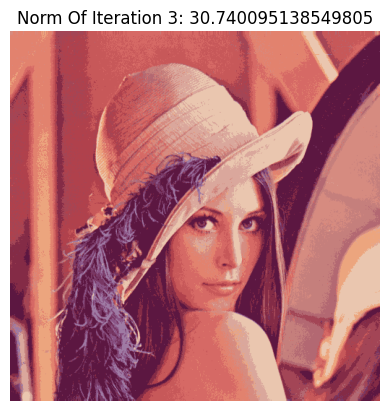

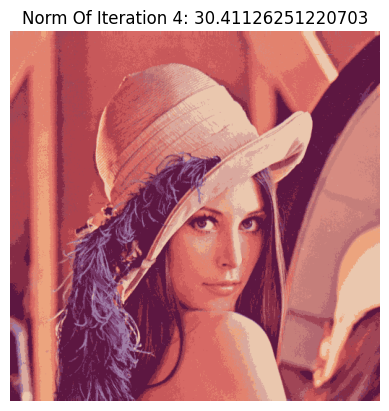

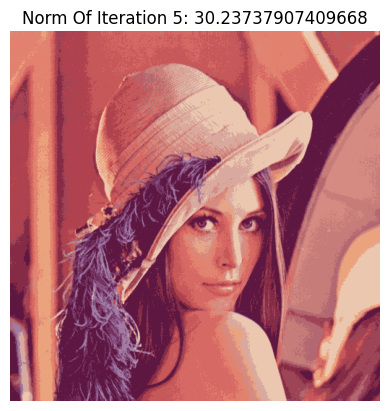

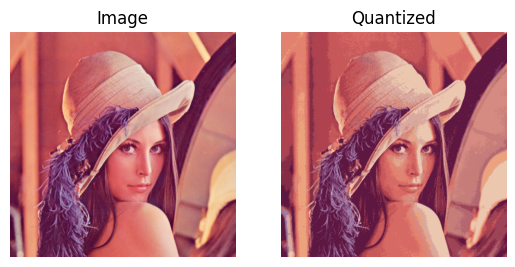

Total L2 Norm: 30.24


In [141]:
#Process images
image_quantized,image_l2_norms=kmeans_quantization(image,k,max_iterations,visualize)

#Save L2 norms
with open("L2_norm_log.txt","w") as f:
    f.write("Image L2 Norms:\n" + "\n".join(map(str,image_l2_norms)) + "\n")

#Calculate final L2 norms
image_l2=calculate_l2_norm(image,image_quantized)

#Visualize results
fig,axes=plt.subplots(1,2)
axes[0].imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
axes[0].set_title("Image")
axes[0].axis("off")
axes[1].imshow(cv2.cvtColor(image_quantized,cv2.COLOR_BGR2RGB))
axes[1].set_title("Quantized")
axes[1].axis("off")
plt.show()

print(f"Total L2 Norm: {image_l2:.2f}")

#Save quantized images
cv2.imwrite("image_quantized.png",(image_quantized*255).astype(np.uint8));